<H1> Fitting to monoexponential functions</H1>

In [1]:
#load necesary modules
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


<H2>Loading data</H2>

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


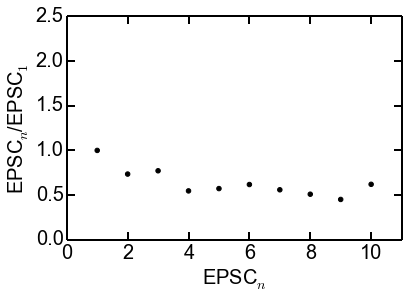

In [2]:
# plot data
data = np.loadtxt('mean-MP20Hz.txt', comments='//')
xval, yval = range(1,11), data[:,0]

plt.scatter(xval, yval, color='k');
plt.xlim(0,11), plt.ylim(0,2.5);
plt.ylabel('EPSC$_{n}$/EPSC$_{1}$');
plt.xlabel('EPSC$_{n}$');

<H2> Fitting to a simple monoexponential model</H2>

We want to fit to a simple monoexponential model of the form:

$f(a,b,c; t) = a * \exp(-b*t) + c, $

where $a$ is amplitude, $b$ is rate (1/ time constant) and $c$ is offset. 

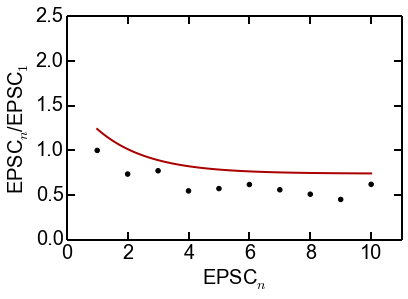

In [3]:
def mymonoexp(x, a, b, c):
    """
    returns a monoexponential function of the form:
    f(a,b,c;x) = a \exp(-b*x) + c, 
    
    where x is the independent variable
    a is the amplitude
    b is the rate (1/ time constant,tau)
    c is the offset 
    """

    return a*np.exp(-b*x) + c

#plot example
t = np.linspace(1,10,100)

myamp = 0.91
myoffset = 0.74
mytau = 1.67

plt.plot(t, mymonoexp( a = myamp, b=1/mytau, c=myoffset, x=t), color='#aa0000')

#plot data together with function
plt.scatter(xval, yval, color='black');
plt.xlim(0,11), plt.ylim(0,2.5);
plt.ylabel('EPSC$_{n}$/EPSC$_{1}$');
plt.xlabel('EPSC$_{n}$');

In [4]:
# fit to the function
popt, pcov = curve_fit(mymonoexp, xval, yval, maxfev=1000)
 
myamp = popt[0]
mytau = 1/popt[1]
myoffset = popt[2]

print('Amp = %2.4f'%myamp)
print('tau = %2.4f'%mytau)
print('offset = %2.4f'%myoffset)

Amp = 0.8094
tau = 1.7227
offset = 0.5359


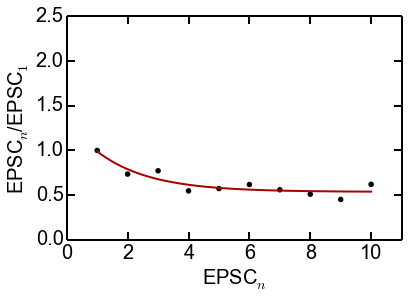

In [5]:
# plot the data together with the function
t = np.linspace(1,10,1000)
plt.plot(t, mymonoexp(a = myamp, b = 1/mytau, c = myoffset, x = t), color='#aa0000')
plt.scatter(xval, yval, color='black')

plt.xlim(0,11), plt.ylim(0,2.5);
plt.ylabel('EPSC$_{n}$/EPSC$_{1}$');
plt.xlabel('EPSC$_{n}$');

This is a good fit, but it has the problem of the return value of the function is not exactly 1 when the indepedent variable (t) is one.

In [6]:
mymonoexp(x=1, a=myamp, b=1/mytau, c=myoffset)

0.98881565598452736

<H2>Monoexponential with boundary condition</H2>
 
<P>Because we have normalized data, we will have to adjust that :</P>

$f(a,b,c;0) = 1$

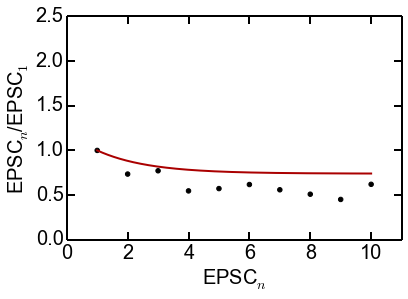

In [7]:
def mymonoexp2(x, b, c):
    """
    returns a monoexponential function of the form:
    f(b,c;x) = \exp(-b*x) + c, 
    
    where x is the independent variable
    b is the rate (1/ time constant,tau)
    c is the offset .
    The function is adjusted to return f(1,b,c)=1
    """
    t = np.array(x) - 1 # so that f(1) = e^0
    return (1-c) * np.exp(-b*t) + c

myamp = 0.91
myoffset = 0.74
mytau = 1.67

plt.plot(t, mymonoexp2( b=1/mytau, c=myoffset, x=t), color='#aa0000')

#plot data together with function
plt.scatter(xval, yval, color='black')
plt.xlim(0,11), plt.ylim(0,2.5);
plt.ylabel('EPSC$_{n}$/EPSC$_{1}$');
plt.xlabel('EPSC$_{n}$');


In [8]:
mymonoexp2(x=1,b=1/mytau, c=myoffset) == 1.0 # must return True

True

In [9]:
# fit to the function
popt, pcov = curve_fit(mymonoexp2, xval, yval, maxfev=1000)
 

mytau = 1/popt[0]
myoffset = popt[1]

print('Amp = %2.4f'%myoffset)
print('tau = %2.4f'%mytau)

Amp = 0.5370
tau = 1.6725


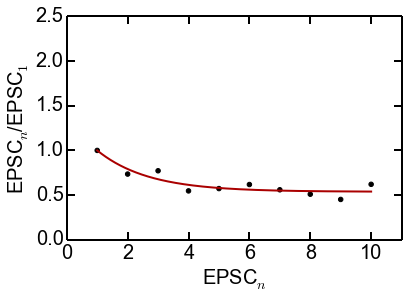

In [10]:
plt.plot(t, mymonoexp2( b=1/mytau, c=myoffset, x=t), color='#aa0000')

#plot data together with function
plt.scatter(xval, yval, color='black')
plt.xlim(0,11), plt.ylim(0,2.5);
plt.ylabel('EPSC$_{n}$/EPSC$_{1}$');
plt.xlabel('EPSC$_{n}$');